In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.ticker as plticker
import pandas as pd
import numpy as np
import matplotlib2tikz as mpt
import math

# build: a function creating the performance profile

### Input

* `input_file`, the path to the file you want to open
* `indexcol`, default 0, it defines the column to consider as index
* `header_`, default 1, it defines the row to consider as header (questo per come sono fatti i miei dati tu mettilo a 0 R)
* `cols`, the columns to include in the graphs
* `colnames`, their name if you want to change them
* `sheetname`, the sheet to consider
* `title`, the title you want to give to the graph
* `filtering`, default 1, it is the minimum number of non dominated points for an instance to be included in the graph (impostalo a 0 R)
* `factor`, default 1, defines the breakpoint for dividing multiple graph

### Output

A performance profile graph.

In [2]:
def build(input_file, indexcol = 0, header_ = 1, cols = None, colnames = None,
          sheetname = None, title = None, filtering = 1, factor = 1, split = 1, boundary = math.inf ):
    
    df = pd.read_excel(input_file, sheet_name = sheetname, index_col = indexcol, header = header_, usecols = cols)
    #print(df.head())
    
    dM = df.to_numpy()
    
    
    #FILTERING INSTANCES WITH LESS THEN 1 SEC OF COMPUTATION
    dM = dM[dM[:,2]>=filtering]
    ran=np.array([0])
    
    ran2 = 2+np.arange(len(dM[0,:])-2)
    ran =np.append(ran, ran2)
    #print(ran)
    #print(len(dM),"  ", len(dM[0,:]) , "   " , len(dM[:,0]))
    dM = dM[:,ran]
    #print(dM)
    #########################################################
    
    
    for i in range(len(dM)):
        for j in range(len(dM[0,:])):
            if dM[i,j] >= boundary:
                dM[i,j] = boundary
                
    
    if colnames == None :
        colnames = cols
    
    dm = dM
    #print(dm)
    dmin = np.amin( dm, axis = 1)
    print(dmin)
    
    
    for i in range(len(dm)) :
        dm[i,:] = np.array( [dm[i, j]/dmin[i] for j in range(len(dm[0,:]))])
        
        
    vec = np.sort( dm, axis = None)
    vec = np.append( vec, vec[len(vec)-1] + 1e-4)
    print(vec[0],"   ", vec[len(vec)-1],"  ", len(vec))
    n = len(dm[0,:])
    pp = np.zeros( (len(vec), n+1))
    pp[:,0] = vec
    for i in range(len(vec)):
        pp[i, 1:(n+1)] = np.array( [ len(dm[dm[:,j] < vec[i],  j])/len(dm[:,j]) for j in range(n)])
        
    print(pp)
   
        
    fig_1 = plt.figure(1, figsize = (10, 4.8))
    inp = 111
    if factor > 1:
        inp = 121
    chart  = fig_1.add_subplot(inp)
    #chart.set_xscale('symlog',linthreshx=7)
    #loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    #chart.xaxis.set_major_locator(loc)
    #start, end = chart.get_xlim()
    #stepsize = 1#1e-3#/5
    #chart.axes.set_xticks(np.arange(1, max(vec)+1, stepsize))
    #chart.axes.set_xticklabels(np.arange(1, max(vec)+1, stepsize))
    
    chart2 = None
    if factor > 1:
        chart2 = fig_1.add_subplot(inp + 1)
        chart2.set_xscale('log')
        #plt.ylim(chart.get_ylim())
    lv = np.max(vec)/factor
    for j in range(n) :
        chart.step( pp[pp[:,0]<lv,0], pp[pp[:,0]<lv, j+1], label = colnames[j+1] )
        if factor > 1:
            chart2.step( pp[pp[:,0]>=lv,0], pp[pp[:,0]>=lv, j+1], label = colnames[j+1] )
        
        
    #chart.legend()
    if factor > 1 :
        chart2.legend() 
    else: 
        chart.legend()
    if title != None: 
        fig_1.suptitle(title)
    name = sheetname + '.tex'
    mpt.save(name)
    plt.show()

In [3]:
cols = { 
       'istanzevecchie' : [ 'Nome istanza',         'BBM time','points', 
                            'FPA_time','FPA_time.1','FPA_time.2',
                            #'FPA_time.3',           'FPA_time.4', 
                            #'FPA_time.5',           
                           'ALA_time',
                            'MALA_time'],
    
        'istanzenuove' :  [ 'Nome istanza',         'BBM time','points' ,
                            'FPA_time',             'FPA_time.1',
                            'FPA_time.2',           #'FPA_time.3',
                            #'FPA_time.4',           
                           'FPA_time.5',
                            'FPA_time.6'],
    
        'istanzevecchiequadratiche' :
                          [ 'Nome istanza',          'points',
                           'FPA_time',              'FPA_time.1',
                           'FPA_time.2',             'FPA_time.6']
        }
       
colnames = { 
        'istanzevecchie' : [ 'Nome istanza',        'BBM', 
                             'FPA-W(0.5,0.5)',          'FPA-W(0.1,0.9)',
                             'FPA-W(0.25,0.75)',        #'w(0.9,0.1)',
                             #'w(0.75,0.25)',        'w(Random)', 
                             'FPA*',                'FPA2'],
    
        'istanzenuove'   : [ 'Nome istanza',        'BBM', 
                             'FPA-W(0.5,0.5)',          'FPA-W(0.1,0.9)',
                             'FPA-W(0.25,0.75)',        #'w(0.9,0.1)',
                             #'w(0.75,0.25)',  
                            'FPA*',
                             'FPA2'],
        'istanzevecchiequadratiche' :
                           [ 'Nome istanza',        'FPA-W(0.5,0.5)',
                             'FPA-W(0.1,0.9)',          'FPA-W(0.25,0.75)',
                             'FPA2']
           }

filtering = 1
sheetnames_titles = [('First group linear instances, filtering >1 non dominated points','istanzevecchie',0),
                     ('Second group linear instances, filtering >1 non dominated points','istanzenuove',1),
                     ('First group quadratic instances, filtering >1 non dominated points','istanzevecchiequadratiche',3)]
factor = {'istanzevecchie': 1, 'istanzenuove':1, 'istanzevecchiequadratiche':12}
input_file = 'Stats.xlsx'

[8.64680e+01 1.69138e+02 2.24900e+00 2.59605e+02 2.81433e+02 4.67250e+01
 2.26940e+01 4.39960e+01 3.08730e+01 3.25387e+02 6.65000e-01 1.10600e+00
 1.15100e+00 1.92400e+00 6.48000e-01 8.24000e-01 9.22000e-01 1.88300e+00
 1.98700e+00 8.75000e-01 1.17500e+00 2.84800e+00 1.45400e+00 3.94000e+00
 6.87700e+00 1.16000e+00 1.01150e+01 7.25000e-01 6.27300e+00 9.91000e-01
 7.01000e-01 6.11800e+00 3.41200e+00 2.40500e+00 3.63600e+00 3.73700e+00
 1.23580e+01 1.08900e+00 3.11000e+00 5.74500e+00 2.96010e+01 2.37300e+00
 3.00940e+01 1.12930e+01 5.71600e+00 1.41700e+01 5.28230e+01 5.34650e+01
 2.22430e+01 1.04300e+00 2.09200e+00 1.25063e+02 2.31500e+00 8.44700e+00
 9.07500e+00 1.12310e+01 9.45600e+00 1.52030e+02 5.51740e+01 1.75790e+01
 3.39400e+00 2.04600e+00 2.88100e+00 3.29200e+01 8.11910e+02 4.42600e+00
 4.11560e+01 2.61900e+00 1.55990e+01 1.46157e+02 5.43084e+02 7.61000e-01
 2.70000e+00 2.86100e+00 9.83000e-01 3.96700e+00 1.19100e+00 7.23000e-01
 5.64000e-01 5.63000e-01 1.07600e+00 1.20200e+00 1.

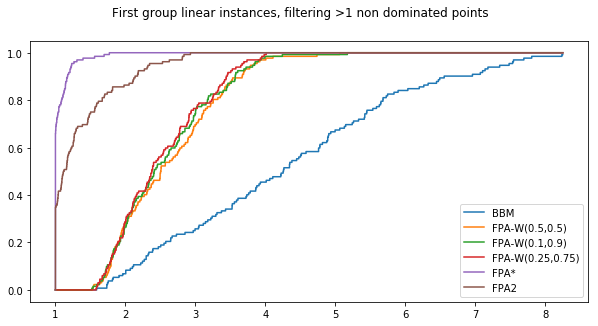

/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


[1.442800e+01 6.222800e+01 6.570370e+02 9.148800e+01 3.191900e+01
 1.605970e+02 9.326450e+02 6.676930e+02 1.490570e+02 4.092900e+01
 3.934410e+02 9.733000e+00 1.449600e+01 9.832000e+01 2.065890e+02
 1.210160e+02 1.090200e+01 2.538000e+02 3.001130e+02 2.190300e+01
 1.086900e+01 6.301590e+02 1.236700e+02 2.623560e+02 5.839400e+01
 1.519300e+01 1.043100e+01 1.054700e+01 3.158300e+01 5.982990e+02
 1.138400e+01 8.302000e+00 5.840000e+01 5.026000e+00 2.236000e+00
 6.575000e+00 3.094600e+01 2.836000e+01 1.105000e+00 2.325500e+02
 2.565900e+01 6.946000e+00 6.783700e+01 1.903800e+02 2.524340e+02
 1.370800e+02 3.669000e+00 6.398400e+01 5.689000e+00 5.153000e+00
 1.216057e+03 6.805060e+02 7.300400e+01 2.070000e+01 3.860300e+01
 9.710000e-01 8.121000e+00 2.024300e+01 4.233600e+01 8.120000e+00
 1.145460e+02 4.345600e+01 1.229160e+02 1.148160e+02 2.018600e+01
 1.408610e+02 1.497070e+02 4.521400e+01 5.889940e+02 2.753000e+00
 4.135000e+00 1.645300e+01 9.544000e+00 3.546200e+01 1.066010e+02
 1.386000e

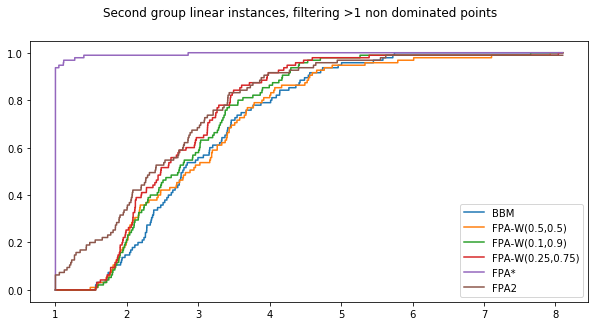

[2.02400000e+00 2.68300000e+00 1.62310000e+01 6.11700000e+00
 2.30900000e+00 1.83800000e+00 1.74500000e+00 4.89000000e-01
 9.19000000e-01 3.36270000e+01 1.58900000e+01 2.21750000e+01
 1.01530000e+01 1.54850000e+01 1.32410000e+01 9.27000000e-01
 4.11900000e+01 1.99930000e+01 6.36600000e+00 3.47300000e+00
 2.39640000e+01 9.92300000e+00 2.44471000e+02 2.54310000e+01
 3.82640000e+01 9.04000000e+01 6.53750000e+01 3.27960000e+01
 1.30273000e+02 1.42770000e+01 6.00580000e+01 9.81970000e+01
 1.17498000e+02 6.62334000e+02 1.52777000e+02 7.12400000e+01
 1.16980000e+02 6.13550000e+01 5.08770000e+01 7.98610000e+01
 2.04040000e+01 6.84894000e+02 3.02916000e+02 2.42602000e+02
 2.10404000e+02 1.65225000e+02 1.18041000e+02 1.83415000e+02
 2.27065000e+02 2.13312800e+03 4.62180000e+02 4.00300000e+01
 6.83000000e-01 1.11000000e-01 1.23800000e+00 9.11000000e-01
 1.77000000e-01 3.50130000e+01 7.09000000e-01 1.19700000e+00
 3.34860000e+01 9.83900000e+00 2.27910000e+01 3.68220000e+01
 7.16500000e+01 5.800000

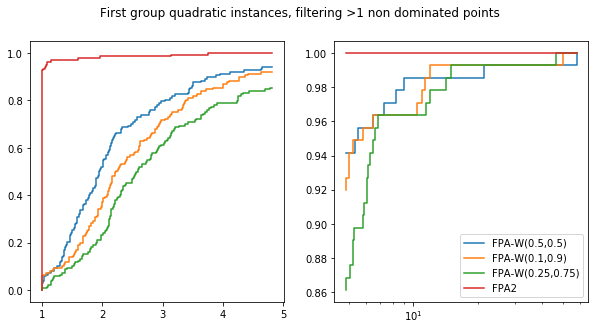

In [4]:
for sheet in sheetnames_titles:
    build( input_file = input_file, cols = cols[sheet[1]], 
           colnames = colnames[sheet[1]], sheetname = sheet[1], 
           title = sheet[0], factor = factor[sheet[1]], boundary = 3600 )

In [5]:
cols = { 
       'istanzevecchie' : [ 'Nome istanza',         'problems','points', 
                            'FPA_total_nodes',      
                           'ALAp',
                            'MALAp'],
    
        'istanzenuove' :  [ 'Nome istanza',         'problems','points' ,
                            'FPA_total_nodes',                                
                            'ALAp',
                            'MALAp'],
    
        'istanzevecchiequadratiche' :
                          [ 'Nome istanza',          'points', 'FPA_total_nodes',  
                           'MALAp']
        }
       
colnames = { 
        'istanzevecchie' : [ 'Nome istanza',        'BBM', 
                            'FPA-W',
                             'FPA*',                'FPA2'],
    
        'istanzenuove'   : [  'Nome istanza',        'BBM', 
                            'FPA-W',
                             'FPA*',                'FPA2'],
        'istanzevecchiequadratiche' :
                           [  'Nome istanza',         
                            'FPA-W',                'FPA2']
           }

filtering = 1
sheetnames_titles = [('First group linear instances, filtering >1 non dominated points','istanzevecchie',0),
                     ('Second group linear instances, filtering >1 non dominated points','istanzenuove',1),
                     ('First group quadratic instances, filtering >1 non dominated points','istanzevecchiequadratiche',3)]
factor = {'istanzevecchie': 1, 'istanzenuove':1, 'istanzevecchiequadratiche':1}
input_file = 'Stats.xlsx'

In [6]:
def buildP(input_file, indexcol = 0, header_ = 1, cols = None, colnames = None,
          sheetname = None, title = None, filtering = 1, factor = 1, split = 1, boundary = math.inf ):
    
    df = pd.read_excel(input_file, sheet_name = sheetname, index_col = indexcol, header = header_, usecols = cols)
    #print(df.head())
    dM = df.to_numpy()
    
    #FILTERING INSTANCES WITH LESS THEN 1 SEC OF COMPUTATION
    dM = dM[dM[:,0]>=filtering]
    ran = 1+np.arange(len(dM[0,:])-1)
    dM = dM[:,ran]
    #########################################################
    
    for i in range(len(dM)):
        for j in range(len(dM[0,:])):
            if dM[i,j] >= boundary:
                dM[i,j] = boundary          
    
    if colnames == None :
        colnames = cols
    
    dm = dM
    dm = dm[dm[:,0].argsort(),:]
    
    n = len(dm[0,:])
    pp = dm
    
    fig_1 = plt.figure(1, figsize = (10, 4.8))
    inp = 111
    chart  = fig_1.add_subplot(inp)
    bp = chart.boxplot(pp, labels = colnames[1:len(colnames)], patch_artist = True)
    
    colors = ['pink', 'lightblue', 'lightgreen','yellow','blue','green']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    #chart.legend()
    fig_1.suptitle(title)
    name = sheetname +"NumProblems"+ '.tex'
    mpt.save(name)
    plt.show()

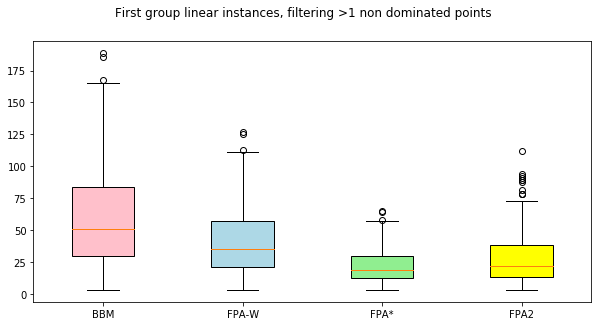

/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


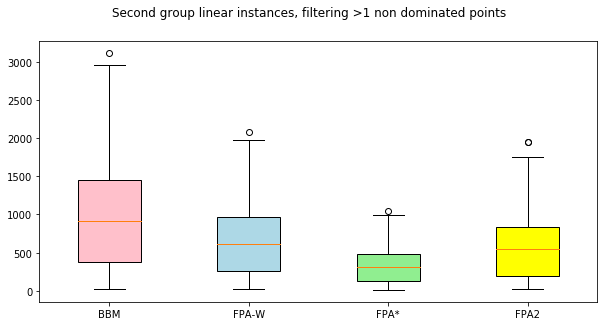

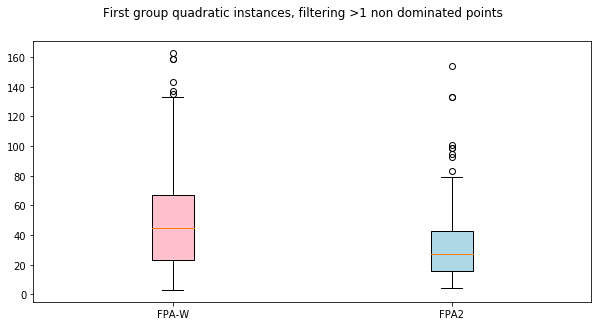

In [7]:
for sheet in sheetnames_titles:
    buildP( input_file = input_file, cols = cols[sheet[1]], 
           colnames = colnames[sheet[1]], sheetname = sheet[1], 
           title = sheet[0], factor = factor[sheet[1]] )

In [13]:
cols = { 
       'istanzevecchie' : [ 'Nome istanza',         'BBM time','points', 
                            'FPA_time','FPA_time.1','FPA_time.2',
                            #'FPA_time.3',           'FPA_time.4', 
                            #'FPA_time.5',           
                           'ALA_time',
                            'MALA_time'],
    
        'istanzenuove' :  [ 'Nome istanza',         'BBM time','points' ,
                            'FPA_time',             'FPA_time.1',
                            'FPA_time.2',           #'FPA_time.3',
                            #'FPA_time.4',           
                           'FPA_time.5',
                            'FPA_time.6'],
    
        'istanzevecchiequadratiche' :
                          [ 'Nome istanza',          'points',
                           'FPA_time',              'FPA_time.1',
                           'FPA_time.2',             'FPA_time.6']
        }
       
colnames = { 
        'istanzevecchie' : [ 'Nome istanza',        'BBM', 'pippo',
                             'FPA-W(0.5,0.5)',          'FPA-W(0.1,0.9)',
                             'FPA-W(0.25,0.75)',        #'w(0.9,0.1)',
                             #'w(0.75,0.25)',        'w(Random)', 
                             'FPA*',                'FPA2'],
    
        'istanzenuove'   : [ 'Nome istanza',        'BBM', 'pippo',
                             'FPA-W(0.5,0.5)',          'FPA-W(0.1,0.9)',
                             'FPA-W(0.25,0.75)',        #'w(0.9,0.1)',
                             #'w(0.75,0.25)',  
                            'FPA*',
                             'FPA2'],
        'istanzevecchiequadratiche' :
                           [ 'Nome istanza',        'FPA-W(0.5,0.5)', 'pippo',
                             'FPA-W(0.1,0.9)',          'FPA-W(0.25,0.75)',
                             'FPA2']
           }

scopes = { 
        'istanzevecchie' : [ (-1, 10), (10,20), (20,30), (30,40), (40,50), (50,65)],
    
        'istanzenuove'   :  [ (9, 70), (70,150), (150,300), (300,500), (500,1000)],
        'istanzevecchiequadratiche' :
                            [ (-1, 10), (10,20), (20,30), (30,40), (40,50), (50,65),(65,100)],
           }



input_file = 'Stats.xlsx'

In [9]:
def buildTable(input_file, indexcol = 0, header_ = 1, cols = None, colnames = None,
          sheetname = None, scopes = [] ):
    
    df = pd.read_excel(input_file, sheet_name = sheetname, index_col = indexcol, header = header_, usecols = cols)
    #print(df.head())
    
    dM = df.to_numpy()
    #print(dM)
    
    table = []
    first_row = ['Cardinality']
    colnamez = []
    colz = []
    colz.append(0)
    colnamez.append(colnames[1])
    for i in range(3,len(colnames)):
        colnamez.append(colnames[i])
        colz.append(i-1)
    for col in colnamez:
        first_row.append( col+" avg")
        first_row.append( col+" min")
        first_row.append( col+" max")
    #table.append(first_row)
    
    d1 = dM[:,1] 
    first_column=[]
    for scope in scopes:
        inst = []
        #print(scope)
        dscope = dM[(d1>scope[0])*(d1<=scope[1])]
        count = len(dscope)
        first_column.append(">"+ str(scope[0])+", <= "+str(scope[1]))
        inst.append( count )
        
        for col in colz:
            avg = sum(dscope[:,col])/count
            min_= min(dscope[:,col])
            max_= max(dscope[:,col])
            inst.append(avg)
            inst.append(min_)
            inst.append(max_)
        table.append(inst)
        
    table = pd.DataFrame(table,  index = first_column, columns = first_row)
    return table
    

In [14]:
tables = []
pd.options.display.float_format = '{:,.1f}'.format

for sheet in sheetnames_titles:
    table = buildTable( input_file = input_file, cols = cols[sheet[1]], 
           colnames = colnames[sheet[1]], sheetname = sheet[1], 
           scopes = scopes[sheet[1]] )
    tables.append(table)
    
table = tables[0]
columns = table.columns
#print(columns)
colus = []
colus.append(columns[0])
for i in range(7,10):
    colus.append(columns[i])
for i in range(10,13):
    colus.append(columns[i])    
for i in range(4,7):
    colus.append(columns[i])
print(table[colus].to_latex())

colus = []
colus.append(columns[0])
for i in range(1,4):
    colus.append(columns[i])
for i in range(13,len(columns)):
    colus.append(columns[i])
print(table[colus].to_latex())

table = tables[1]
columns = table.columns
#print(columns)
colus = []
colus.append(columns[0])
for i in range(7,10):
    colus.append(columns[i])
for i in range(10,13):
    colus.append(columns[i])    
for i in range(4,7):
    colus.append(columns[i])
print(table[colus].to_latex())

colus = []
colus.append(columns[0])
for i in range(1,4):
    colus.append(columns[i])
for i in range(13,len(columns)):
    colus.append(columns[i])
print(table[colus].to_latex())

table = tables[2]

columns = table.columns
print(":::::::::::::", columns)
print(table.to_latex())

#print(tables[2].to_latex())
    
    

/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal


\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Cardinality &  FPA-W(0.1,0.9) avg &  FPA-W(0.1,0.9) min &  FPA-W(0.1,0.9) max &  FPA-W(0.25,0.75) avg &  FPA-W(0.25,0.75) min &  FPA-W(0.25,0.75) max &  FPA-W(0.5,0.5) avg &  FPA-W(0.5,0.5) min &  FPA-W(0.5,0.5) max \\
\midrule
>-1, <= 10 &           66 &                 0.7 &                 0.0 &                11.6 &                   0.7 &                   0.0 &                   8.2 &                 0.7 &                 0.0 &                 9.2 \\
>10, <= 20 &           71 &                 8.4 &                 0.2 &               105.7 &                   8.1 &                   0.2 &                 103.2 &                 8.4 &                 0.2 &               102.3 \\
>20, <= 30 &           37 &                47.6 &                 0.4 &               395.9 &                  46.5 &                   0.4 &                 392.3 &                50.3 &                 0.3 &               414.8 \\
>30, <= 40 &           19 &  

In [ ]:
print("$")

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as k
import tensorflow as tf

model = Sequential()
xinp = np.array([[1,2,3,4], [1,2,3,4]])
model.add(Dense(2, input_dim=4, init='uniform', activation='linear'))
#model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(2, init='uniform', activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
outputTensor = model.output 
listOfVariableTensors = model.trainable_weights

print(xinp[0])
prediction =  model.predict([[xinp[0]]])
print("Prediction", np.array(prediction[0]))

gradients = k.gradients(model.output[:,0], model.input)
gradients2 = k.gradients( outputTensor[:,1], listOfVariableTensors)
#trainingExample = np.random.random((1,8))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
evaluated_gradients = sess.run(gradients,feed_dict={model.input: xinp})
evaluated_gradients2 = sess.run(gradients2, feed_dict = {model.input: xinp})
print("EG ",evaluated_gradients)
print("EG2", evaluated_gradients2)
#print(model.input)
sess.close()


/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=4, activation="linear", kernel_initializer="uniform")`
  
/home/giorgio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="linear", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


[1 2 3 4]
Prediction [-4.2842845e-03 -9.3954150e-06]
EG  [array([[-0.00078012, -0.00129599, -0.00068066,  0.00028245],
       [-0.00078012, -0.00129599, -0.00068066,  0.00028245]],
      dtype=float32)]
EG2 [array([[ 0.09635101, -0.04128609],
       [ 0.19270201, -0.08257218],
       [ 0.28905302, -0.12385827],
       [ 0.38540402, -0.16514435]], dtype=float32), array([ 0.09635101, -0.04128609], dtype=float32), array([[0.        , 0.13858747],
       [0.        , 0.32433742]], dtype=float32), array([0., 2.], dtype=float32)]


In [106]:
sess.close()

In [110]:
val = evaluated_gradients
print(val)
print(evaluated_gradients[0])
print(evaluated_gradients[0]+ evaluated_gradients[0]*2)

[array([[ 0.00051717,  0.00053667, -0.00029764, -0.00058782],
       [ 0.00051717,  0.00053667, -0.00029764, -0.00058782]],
      dtype=float32)]
[[ 0.00051717  0.00053667 -0.00029764 -0.00058782]
 [ 0.00051717  0.00053667 -0.00029764 -0.00058782]]
[[ 0.0015515   0.00161002 -0.00089291 -0.00176345]
 [ 0.0015515   0.00161002 -0.00089291 -0.00176345]]


In [146]:
vec = np.array([1,2,3,4,5,6,7,8])
ret = [round(vec[i]/10) for i in range(len(vec))]
fret = [ 1 if ret[i]>=0.5 else 0 for i in range(len(ret))]
action = fret
boh = [ i if action[i]>0.5 else -1 for i in range(len(action))]
print(ret,"\n",fret,"\n",[action[i] for i in range(len(action)) if action[i] >=0])

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0] 
 [0, 0, 0, 0, 0, 1, 1, 1] 
 [0, 0, 0, 0, 0, 1, 1, 1]


In [128]:
print(round(0.51))

1


In [150]:
mb = np.matrix([[0,0,0,3]])
print(mb)
for m in mb :
    print(m)

[[0 0 0 3]]
[[0 0 0 3]]


In [7]:
print(np.random.rand(10))
n = 10
print( np.random.randint( low = 1, high = 10, size=n))

[0.55749439 0.30662876 0.62841743 0.97580605 0.0883431  0.73136529
 0.08864981 0.85812365 0.24451689 0.3886738 ]
[9 2 8 6 6 2 3 5 2 4]
